# Training Analysis Notebook

This notebook provides an interactive way to:
1. **Visualize the dataset** - See samples and class distributions
2. **Train models** - Compare training with and without early stopping
3. **Analyze results** - View training curves and compare performance

## Phase 1.1: Early Stopping Implementation

Following the textbook algorithm from Goodfellow et al.'s Deep Learning book.


## 1. Setup and Imports


In [1]:
# Add parent directory to path to import our modules
import sys
sys.path.append('..')

# Import our training pipeline and utilities
from training.pipeline import TrainingPipeline, setup_training_config
from data.dataset_utils import *
from visualization.plots import ResultsVisualizer

# Standard imports
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import json
from IPython.display import Image, display

# Set up matplotlib for inline plotting
%matplotlib inline
plt.style.use('default')

print("✅ Imports successful!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"MPS available: {torch.backends.mps.is_available()}")


✅ Imports successful!
PyTorch version: 2.3.1
CUDA available: False
MPS available: False


## 2. Dataset Visualization

Let's explore the FashionMNIST dataset to understand what we're working with.


🖥️  Using device: CPU
⚠️  Training on CPU - this may take a while!
Loading FashionMNIST dataset...
Preparing FashionMNIST dataset...
Dataset ready!
Setting up datasets (validation split: 0.1, data_cap_rate: 20)...
Applied data cap rate: 1/20
Train size: 2,700, Val size: 300, Test size: 500
✅ Data loading complete!
📁 Saving results to: results/20251016_013258

✅ Pipeline setup complete!
   Dataset: FashionMNIST
   Device: cpu
   Models: ['MLP_Small', 'MLP_Large', 'CNN_Small', 'CNN_Large']
  Dataset: FashionMNIST
Classes: 10
Class names: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

Dataset sizes:
  Training:   2,700 samples
  Validation: 300 samples
  Test:       500 samples
  Total:      3,500 samples

Data cap rate: 20 (using 1/20 of data)
Original training size would be: 54,000 samples

Random samples from training set:


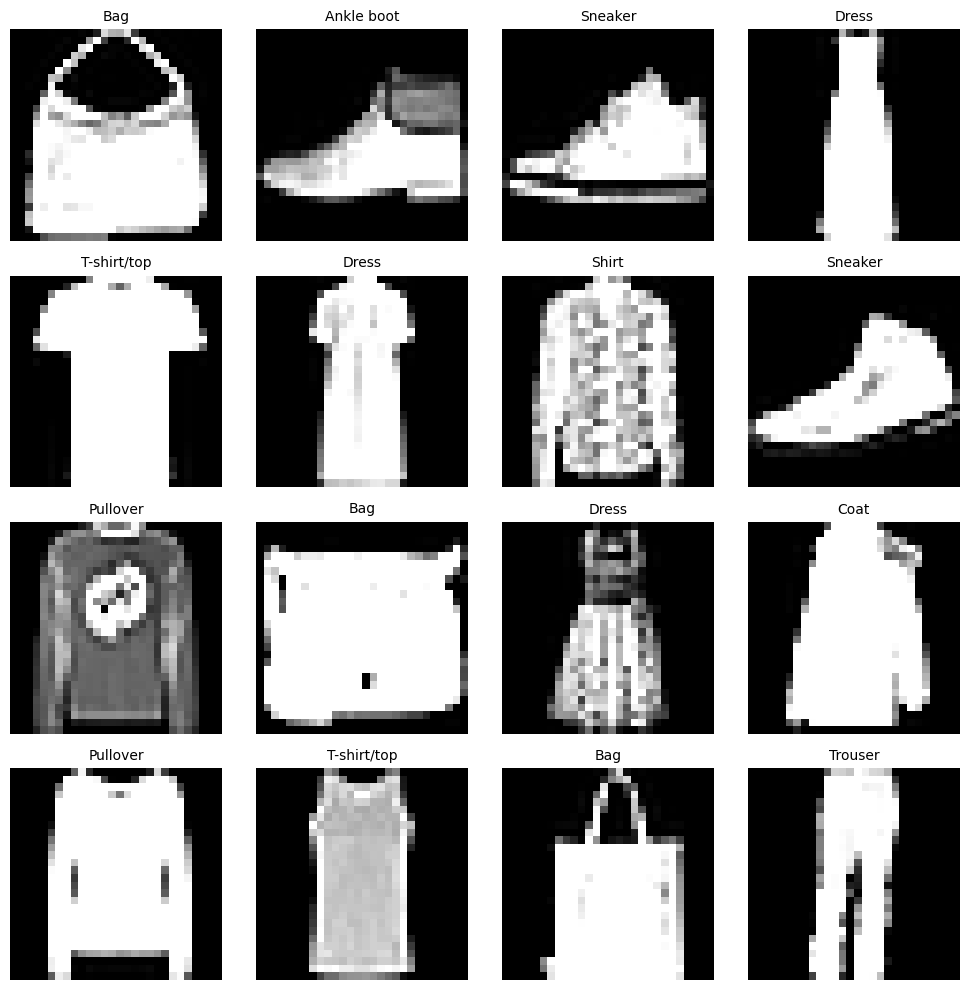


Class distribution:


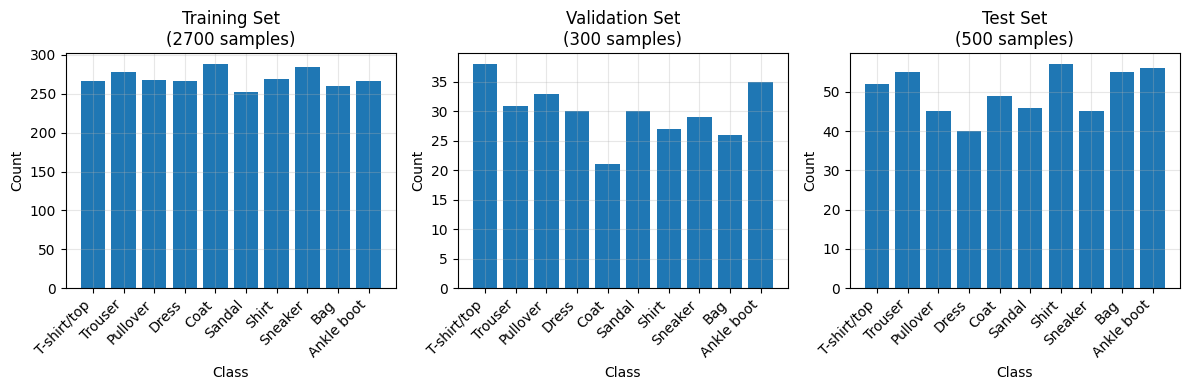

In [2]:
# Create a pipeline just for dataset exploration
pipeline = TrainingPipeline(dataset_name='FashionMNIST', verbose=False)
pipeline.setup()

# Visualize the dataset
visualize_dataset_samples(pipeline.data_module, num_samples=16, seed=42)


## 3. Training Configuration

Configure the training parameters. You can modify these to experiment with different settings.


In [3]:
# Training configuration
training_config = setup_training_config(
    batch_size=128,
    learning_rate=0.0005,
    max_epochs=50,
    data_cap_rate=20,  # Using 1/20 of data for overfitting experiments
    
    # Early stopping configuration
    early_stopping_enabled=True,          # Toggle this to True/False
    early_stopping_patience=10,           # Wait 10 epochs before stopping
    early_stopping_mode='min',            # Minimize validation loss
    early_stopping_restore_best=True      # Restore best weights when stopping
)

print("Training Configuration:")
for key, value in training_config.items():
    print(f"  {key}: {value}")

# Highlight early stopping status
if training_config['early_stopping_enabled']:
    print(f"\n⚡ Early stopping: ENABLED (patience={training_config['early_stopping_patience']})")
else:
    print(f"\n⏱️  Early stopping: DISABLED (will train for full {training_config['max_epochs']} epochs)")


Training Configuration:
  batch_size: 128
  learning_rate: 0.0005
  optimizer: Adam
  loss_function: CrossEntropyLoss
  max_epochs: 50
  val_split: 0.1
  random_seed: 42
  data_cap_rate: 20
  lr_scheduler: ReduceLROnPlateau
  lr_scheduler_patience: 5
  lr_scheduler_factor: 0.5
  early_stopping_enabled: True
  early_stopping_patience: 10
  early_stopping_mode: min
  early_stopping_restore_best: True

⚡ Early stopping: ENABLED (patience=10)


## 4. Train WITHOUT Early Stopping

First, let's train all models without early stopping to see the full training dynamics.


In [4]:
# Create pipeline for training without early stopping
pipeline_no_es = TrainingPipeline(
    dataset_name='FashionMNIST',
    config=training_config.copy(),
    verbose=False  # Turn off verbose output for cleaner notebook
)

# Override early stopping to disabled
pipeline_no_es.config['early_stopping_enabled'] = False

# Setup and train
pipeline_no_es.setup()
print("\n🚀 Starting training WITHOUT early stopping...")
results_no_es = pipeline_no_es.train(early_stopping_enabled=False)

# Save results
pipeline_no_es.save_results()

# Print summary
pipeline_no_es.print_summary()


🖥️  Using device: CPU
⚠️  Training on CPU - this may take a while!
Loading FashionMNIST dataset...
Preparing FashionMNIST dataset...
Dataset ready!
Setting up datasets (validation split: 0.1, data_cap_rate: 20)...
Applied data cap rate: 1/20
Train size: 2,700, Val size: 300, Test size: 500
✅ Data loading complete!
📁 Saving results to: results/20251016_013304

✅ Pipeline setup complete!
   Dataset: FashionMNIST
   Device: cpu
   Models: ['MLP_Small', 'MLP_Large', 'CNN_Small', 'CNN_Large']

🚀 Starting training WITHOUT early stopping...

  Training Configuration
  batch_size: 128
  learning_rate: 0.0005
  optimizer: Adam
  loss_function: CrossEntropyLoss
  max_epochs: 50
  val_split: 0.1
  random_seed: 42
  data_cap_rate: 20
  lr_scheduler: ReduceLROnPlateau
  lr_scheduler_patience: 5
  lr_scheduler_factor: 0.5
  early_stopping_enabled: False
  early_stopping_patience: 10
  early_stopping_mode: min
  early_stopping_restore_best: True

⏱️  Early stopping: DISABLED (will train for full 50 e


Evaluating on test set...


Testing: 100%|██████████| 4/4 [00:00<00:00, 81.59it/s, acc=82.80%]


Test Accuracy: 82.80%

  Training MLP_Large
Training for up to 50 epochs...
Device: cpu
Model parameters: 105,258



Evaluating on test set...


Testing: 100%|██████████| 4/4 [00:00<00:00, 61.81it/s, acc=85.20%]


Test Accuracy: 85.20%

  Training CNN_Small
Training for up to 50 epochs...
Device: cpu
Model parameters: 324,074



Evaluating on test set...


Testing: 100%|██████████| 4/4 [00:00<00:00, 30.30it/s, acc=87.80%]


Test Accuracy: 87.80%

  Training CNN_Large
Training for up to 50 epochs...
Device: cpu
Model parameters: 688,586



Evaluating on test set...


Testing: 100%|██████████| 4/4 [00:00<00:00, 26.87it/s, acc=88.60%]


Test Accuracy: 88.60%

📊 Generating plots for MLP_Small...
  ✓ Saved: MLP_Small_training_curves.png

📊 Generating plots for MLP_Large...
  ✓ Saved: MLP_Large_training_curves.png

📊 Generating plots for CNN_Small...
  ✓ Saved: CNN_Small_training_curves.png

📊 Generating plots for CNN_Large...
  ✓ Saved: CNN_Large_training_curves.png

📊 Generating comparison plots...
  ✓ Saved: model_comparison.png
💾 Saved model checkpoint: MLP_Small_final.pth
💾 Saved model checkpoint: MLP_Large_final.pth
💾 Saved model checkpoint: CNN_Small_final.pth
💾 Saved model checkpoint: CNN_Large_final.pth
  ✓ Saved: summary.json

📁 All results saved to: results/20251016_013304

  TRAINING COMPLETE!

Test Accuracies:
  MLP_Small: 82.80%
  MLP_Large: 85.20%
  CNN_Small: 87.80%
  CNN_Large: 88.60%

Training Times:
  MLP_Small: 0m 17s
  MLP_Large: 0m 18s
  CNN_Small: 0m 57s
  CNN_Large: 1m 54s

Early Stopping Info:
  MLP_Small: Completed all epochs
  MLP_Large: Completed all epochs
  CNN_Small: Completed all epochs
  

## 5. Train WITH Early Stopping

Now let's train the same models with early stopping enabled to see the difference.


In [5]:
# Create pipeline for training with early stopping
pipeline_with_es = TrainingPipeline(
    dataset_name='FashionMNIST',
    config=training_config.copy(),
    verbose=False  # Turn off verbose output for cleaner notebook
)

# Ensure early stopping is enabled
pipeline_with_es.config['early_stopping_enabled'] = True

# Setup and train
pipeline_with_es.setup()
print("\n🚀 Starting training WITH early stopping...")
results_with_es = pipeline_with_es.train(early_stopping_enabled=True)

# Save results
pipeline_with_es.save_results()

# Print summary
pipeline_with_es.print_summary()


🖥️  Using device: CPU
⚠️  Training on CPU - this may take a while!
Loading FashionMNIST dataset...
Preparing FashionMNIST dataset...
Dataset ready!
Setting up datasets (validation split: 0.1, data_cap_rate: 20)...
Applied data cap rate: 1/20
Train size: 2,700, Val size: 300, Test size: 500
✅ Data loading complete!
📁 Saving results to: results/20251016_013634

✅ Pipeline setup complete!
   Dataset: FashionMNIST
   Device: cpu
   Models: ['MLP_Small', 'MLP_Large', 'CNN_Small', 'CNN_Large']

🚀 Starting training WITH early stopping...

  Training Configuration
  batch_size: 128
  learning_rate: 0.0005
  optimizer: Adam
  loss_function: CrossEntropyLoss
  max_epochs: 50
  val_split: 0.1
  random_seed: 42
  data_cap_rate: 20
  lr_scheduler: ReduceLROnPlateau
  lr_scheduler_patience: 5
  lr_scheduler_factor: 0.5
  early_stopping_enabled: True
  early_stopping_patience: 10
  early_stopping_mode: min
  early_stopping_restore_best: True

⚡ Early stopping: ENABLED (patience=10)

  Model Configura


Evaluating on test set...


Testing: 100%|██████████| 4/4 [00:00<00:00, 52.19it/s, acc=83.00%]


Test Accuracy: 83.00%

  Training MLP_Large
Training for up to 50 epochs...
Device: cpu
Model parameters: 105,258
Early stopping enabled: patience=10, mode=min



Evaluating on test set...


Testing: 100%|██████████| 4/4 [00:00<00:00, 70.08it/s, acc=82.60%]


Test Accuracy: 82.60%

  Training CNN_Small
Training for up to 50 epochs...
Device: cpu
Model parameters: 324,074
Early stopping enabled: patience=10, mode=min



Evaluating on test set...


Testing: 100%|██████████| 4/4 [00:00<00:00, 35.41it/s, acc=84.60%]


Test Accuracy: 84.60%

  Training CNN_Large
Training for up to 50 epochs...
Device: cpu
Model parameters: 688,586
Early stopping enabled: patience=10, mode=min



Evaluating on test set...


Testing: 100%|██████████| 4/4 [00:00<00:00, 26.38it/s, acc=87.40%]


Test Accuracy: 87.40%

📊 Generating plots for MLP_Small...
  ✓ Saved: MLP_Small_training_curves.png

📊 Generating plots for MLP_Large...
  ✓ Saved: MLP_Large_training_curves.png

📊 Generating plots for CNN_Small...
  ✓ Saved: CNN_Small_training_curves.png

📊 Generating plots for CNN_Large...
  ✓ Saved: CNN_Large_training_curves.png

📊 Generating comparison plots...
  ✓ Saved: model_comparison.png
💾 Saved model checkpoint: MLP_Small_final.pth
💾 Saved model checkpoint: MLP_Large_final.pth
💾 Saved model checkpoint: CNN_Small_final.pth
💾 Saved model checkpoint: CNN_Large_final.pth
  ✓ Saved: summary.json

📁 All results saved to: results/20251016_013634

  TRAINING COMPLETE!

Test Accuracies:
  MLP_Small: 83.00%
  MLP_Large: 82.60%
  CNN_Small: 84.60%
  CNN_Large: 87.40%

Training Times:
  MLP_Small: 0m 17s
  MLP_Large: 0m 12s
  CNN_Small: 0m 26s
  CNN_Large: 0m 52s

Early Stopping Info:
  MLP_Small: Completed all epochs
  MLP_Large: Stopped at epoch 34, best at epoch 24
  CNN_Small: Stoppe

## 6. Compare Results

Let's compare the results from both training runs to see the benefits of early stopping.


In [6]:
# Get results from both pipelines
results_no_es, test_acc_no_es = pipeline_no_es.get_results()
results_with_es, test_acc_with_es = pipeline_with_es.get_results()

print("=" * 80)
print("  COMPARISON: Training WITHOUT vs WITH Early Stopping")
print("=" * 80)

print("\n📊 Test Accuracies:")
print("-" * 40)
for model_name in test_acc_no_es.keys():
    acc_no_es = test_acc_no_es[model_name]
    acc_with_es = test_acc_with_es[model_name]
    diff = acc_with_es - acc_no_es
    print(f"{model_name:12}: {acc_no_es:6.2f}% → {acc_with_es:6.2f}% (Δ{diff:+5.2f}%)")

print("\n⏱️  Training Times:")
print("-" * 40)
for model_name in results_no_es.keys():
    time_no_es = results_no_es[model_name]['total_training_time']
    time_with_es = results_with_es[model_name]['total_training_time']
    time_saved = time_no_es - time_with_es
    
    # Format times in readable format
    def format_time(seconds):
        minutes = int(seconds // 60)
        secs = int(seconds % 60)
        return f"{minutes}m {secs}s"
    
    print(f"{model_name:12}: {format_time(time_no_es)} → {format_time(time_with_es)} (saved {format_time(time_saved)})")

print("\n🛑 Early Stopping Info:")
print("-" * 40)
for model_name in results_with_es.keys():
    history = results_with_es[model_name]
    if history.get('early_stopped', False):
        stopped_epoch = history.get('stopped_epoch')
        best_epoch = history.get('best_epoch')
        print(f"{model_name:12}: Stopped at epoch {stopped_epoch:2d}, best at epoch {best_epoch:2d}")
    else:
        print(f"{model_name:12}: Completed all epochs (no early stopping)")


  COMPARISON: Training WITHOUT vs WITH Early Stopping

📊 Test Accuracies:
----------------------------------------
MLP_Small   :  82.80% →  83.00% (Δ+0.20%)
MLP_Large   :  85.20% →  82.60% (Δ-2.60%)
CNN_Small   :  87.80% →  84.60% (Δ-3.20%)
CNN_Large   :  88.60% →  87.40% (Δ-1.20%)

⏱️  Training Times:
----------------------------------------
MLP_Small   : 0m 17s → 0m 17s (saved -1m 59s)
MLP_Large   : 0m 18s → 0m 12s (saved 0m 6s)
CNN_Small   : 0m 57s → 0m 26s (saved 0m 31s)
CNN_Large   : 1m 54s → 0m 52s (saved 1m 2s)

🛑 Early Stopping Info:
----------------------------------------
MLP_Small   : Completed all epochs (no early stopping)
MLP_Large   : Stopped at epoch 34, best at epoch 24
CNN_Small   : Stopped at epoch 24, best at epoch 14
CNN_Large   : Stopped at epoch 28, best at epoch 18


## 7. Visual Comparison

Let's create side-by-side plots to visualize the differences.


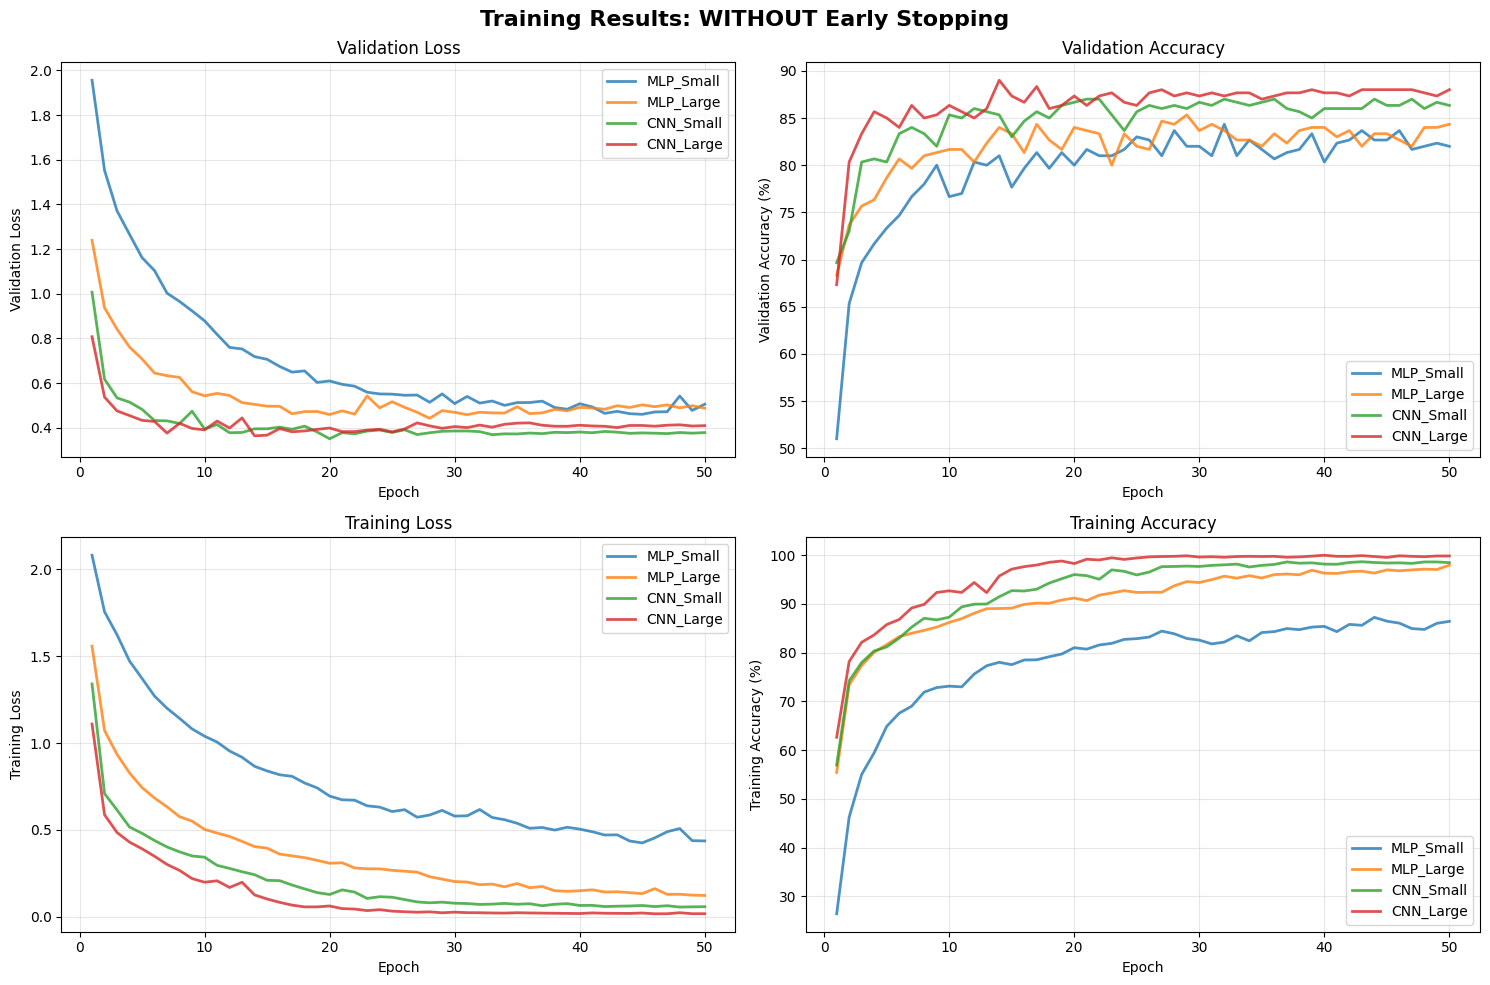

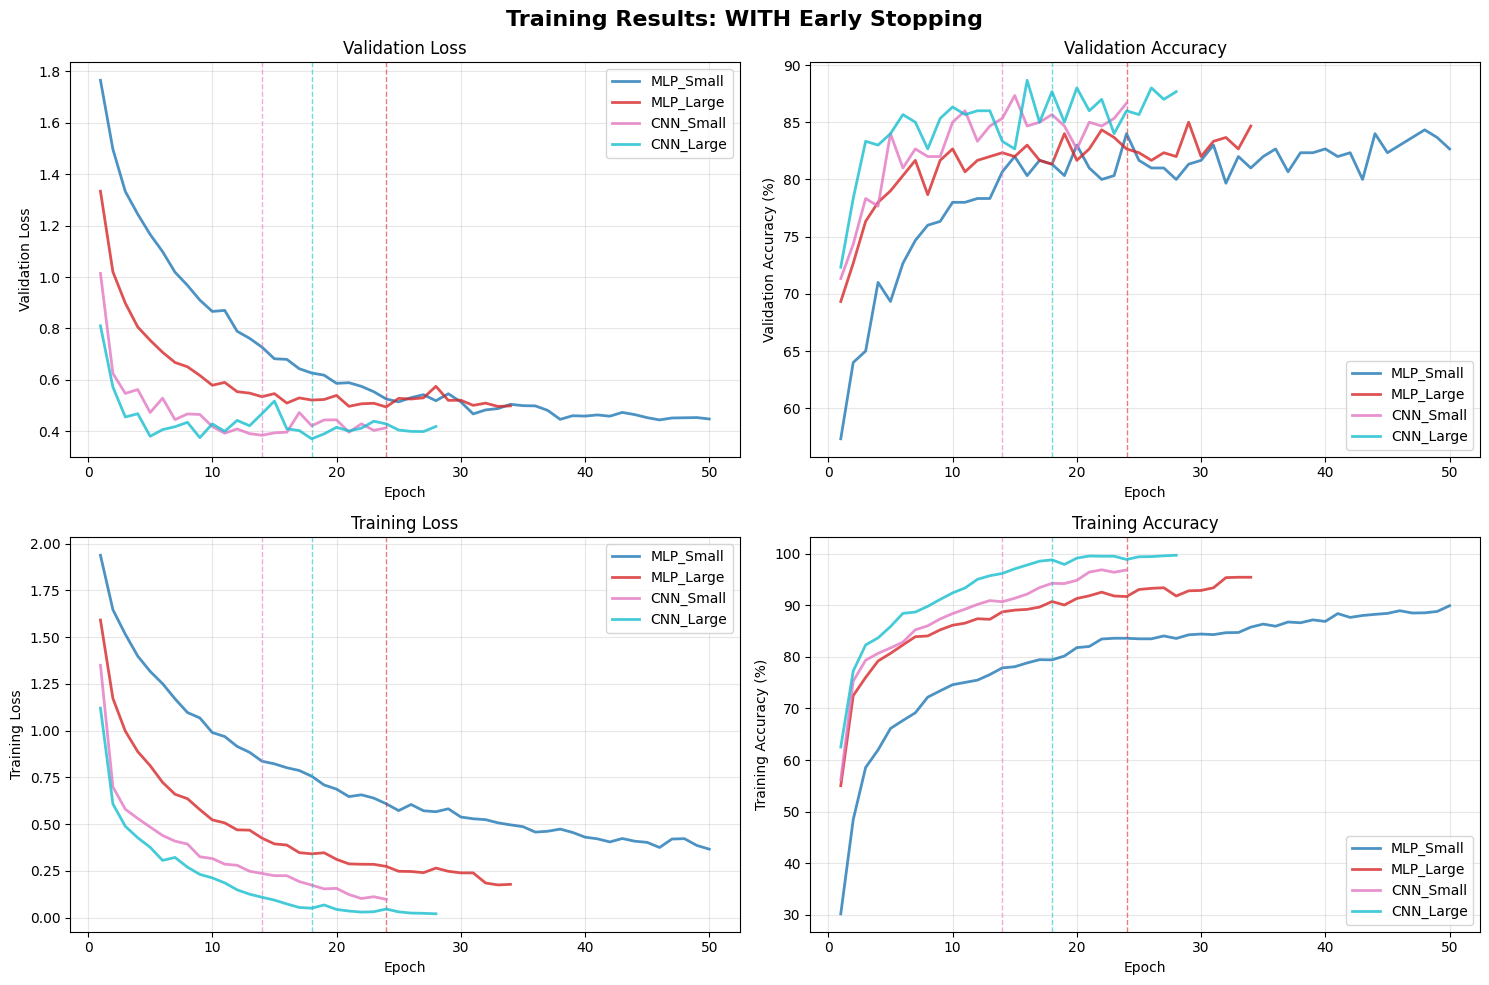

In [12]:
# Create two separate 2x2 grids

# First grid: WITHOUT Early Stopping
fig1, axes1 = plt.subplots(2, 2, figsize=(15, 10))
fig1.suptitle('Training Results: WITHOUT Early Stopping', fontsize=16, fontweight='bold')

# Plot validation loss (No ES)
ax1 = axes1[0, 0]
for model_name in results_no_es.keys():
    epochs_no_es = range(1, len(results_no_es[model_name]['val_loss']) + 1)
    ax1.plot(epochs_no_es, results_no_es[model_name]['val_loss'], 
             label=model_name, linewidth=2, alpha=0.8)

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Loss')
ax1.set_title('Validation Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot validation accuracy (No ES)
ax2 = axes1[0, 1]
for model_name in results_no_es.keys():
    epochs_no_es = range(1, len(results_no_es[model_name]['val_acc']) + 1)
    ax2.plot(epochs_no_es, results_no_es[model_name]['val_acc'], 
             label=model_name, linewidth=2, alpha=0.8)

ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation Accuracy (%)')
ax2.set_title('Validation Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot training loss (No ES)
ax3 = axes1[1, 0]
for model_name in results_no_es.keys():
    epochs_no_es = range(1, len(results_no_es[model_name]['train_loss']) + 1)
    ax3.plot(epochs_no_es, results_no_es[model_name]['train_loss'], 
             label=model_name, linewidth=2, alpha=0.8)

ax3.set_xlabel('Epoch')
ax3.set_ylabel('Training Loss')
ax3.set_title('Training Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot training accuracy (No ES)
ax4 = axes1[1, 1]
for model_name in results_no_es.keys():
    epochs_no_es = range(1, len(results_no_es[model_name]['train_acc']) + 1)
    ax4.plot(epochs_no_es, results_no_es[model_name]['train_acc'], 
             label=model_name, linewidth=2, alpha=0.8)

ax4.set_xlabel('Epoch')
ax4.set_ylabel('Training Accuracy (%)')
ax4.set_title('Training Accuracy')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Second grid: WITH Early Stopping
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 10))
fig2.suptitle('Training Results: WITH Early Stopping', fontsize=16, fontweight='bold')

# Generate distinct colors for consistent coloring
colors = plt.cm.tab10(np.linspace(0, 1, len(results_with_es.keys())))

# Plot validation loss (With ES) - with vertical lines at best epoch
ax5 = axes2[0, 0]
for i, model_name in enumerate(results_with_es.keys()):
    epochs_with_es = range(1, len(results_with_es[model_name]['val_loss']) + 1)
    ax5.plot(epochs_with_es, results_with_es[model_name]['val_loss'], 
             label=model_name, linewidth=2, alpha=0.8, color=colors[i])
    
    # Add vertical line at best epoch if early stopping occurred
    if results_with_es[model_name].get('early_stopped', False):
        best_epoch = results_with_es[model_name].get('best_epoch', 1)
        ax5.axvline(x=best_epoch, color=colors[i], linestyle='--', alpha=0.6, linewidth=1)

ax5.set_xlabel('Epoch')
ax5.set_ylabel('Validation Loss')
ax5.set_title('Validation Loss')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot validation accuracy (With ES) - with vertical lines at best epoch
ax6 = axes2[0, 1]
for i, model_name in enumerate(results_with_es.keys()):
    epochs_with_es = range(1, len(results_with_es[model_name]['val_acc']) + 1)
    ax6.plot(epochs_with_es, results_with_es[model_name]['val_acc'], 
             label=model_name, linewidth=2, alpha=0.8, color=colors[i])
    
    # Add vertical line at best epoch if early stopping occurred
    if results_with_es[model_name].get('early_stopped', False):
        best_epoch = results_with_es[model_name].get('best_epoch', 1)
        ax6.axvline(x=best_epoch, color=colors[i], linestyle='--', alpha=0.6, linewidth=1)

ax6.set_xlabel('Epoch')
ax6.set_ylabel('Validation Accuracy (%)')
ax6.set_title('Validation Accuracy')
ax6.legend()
ax6.grid(True, alpha=0.3)

# Plot training loss (With ES) - with vertical lines at best epoch
ax7 = axes2[1, 0]
for i, model_name in enumerate(results_with_es.keys()):
    epochs_with_es = range(1, len(results_with_es[model_name]['train_loss']) + 1)
    ax7.plot(epochs_with_es, results_with_es[model_name]['train_loss'], 
             label=model_name, linewidth=2, alpha=0.8, color=colors[i])
    
    # Add vertical line at best epoch if early stopping occurred
    if results_with_es[model_name].get('early_stopped', False):
        best_epoch = results_with_es[model_name].get('best_epoch', 1)
        ax7.axvline(x=best_epoch, color=colors[i], linestyle='--', alpha=0.6, linewidth=1)

ax7.set_xlabel('Epoch')
ax7.set_ylabel('Training Loss')
ax7.set_title('Training Loss')
ax7.legend()
ax7.grid(True, alpha=0.3)

# Plot training accuracy (With ES) - with vertical lines at best epoch
ax8 = axes2[1, 1]
for i, model_name in enumerate(results_with_es.keys()):
    epochs_with_es = range(1, len(results_with_es[model_name]['train_acc']) + 1)
    ax8.plot(epochs_with_es, results_with_es[model_name]['train_acc'], 
             label=model_name, linewidth=2, alpha=0.8, color=colors[i])
    
    # Add vertical line at best epoch if early stopping occurred
    if results_with_es[model_name].get('early_stopped', False):
        best_epoch = results_with_es[model_name].get('best_epoch', 1)
        ax8.axvline(x=best_epoch, color=colors[i], linestyle='--', alpha=0.6, linewidth=1)

ax8.set_xlabel('Epoch')
ax8.set_ylabel('Training Accuracy (%)')
ax8.set_title('Training Accuracy')
ax8.legend()
ax8.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Summary and Conclusions

Let's summarize the key findings from our early stopping experiment.


In [11]:
# Calculate summary statistics
print("📋 EXPERIMENT SUMMARY")
print("=" * 60)

# Time savings
total_time_no_es = sum(results_no_es[name]['total_training_time'] for name in results_no_es.keys())
total_time_with_es = sum(results_with_es[name]['total_training_time'] for name in results_with_es.keys())
time_saved_total = total_time_no_es - total_time_with_es

# Format time helper function
def format_time(seconds):
    minutes = int(seconds // 60)
    secs = int(seconds % 60)
    return f"{minutes}m {secs}s"

print(f"\n⏱️  TIME SAVINGS:")
print(f"  Total training time (no ES): {format_time(total_time_no_es)}")
print(f"  Total training time (with ES): {format_time(total_time_with_es)}")
print(f"  Time saved: {format_time(time_saved_total)} ({time_saved_total/total_time_no_es*100:.1f}%)")

# Accuracy comparison
avg_acc_no_es = np.mean(list(test_acc_no_es.values()))
avg_acc_with_es = np.mean(list(test_acc_with_es.values()))
acc_diff = avg_acc_with_es - avg_acc_no_es

print(f"\n📊 ACCURACY COMPARISON:")
print(f"  Average test accuracy (no ES): {avg_acc_no_es:.2f}%")
print(f"  Average test accuracy (with ES): {avg_acc_with_es:.2f}%")
print(f"  Accuracy difference: {acc_diff:+.2f}%")

# Early stopping effectiveness
models_stopped = sum(1 for name in results_with_es.keys() 
                    if results_with_es[name].get('early_stopped', False))
total_models = len(results_with_es)

print(f"\n🛑 EARLY STOPPING EFFECTIVENESS:")
print(f"  Models that stopped early: {models_stopped}/{total_models}")
print(f"  Early stopping rate: {models_stopped/total_models*100:.1f}%")

print(f"\n✅ CONCLUSION:")
if time_saved_total > 0:
    print(f"  Early stopping saved {format_time(time_saved_total)} of training time")
if acc_diff >= 0:
    print(f"  Early stopping maintained or improved accuracy (+{acc_diff:.2f}%)")
else:
    print(f"  Early stopping slightly reduced accuracy ({acc_diff:.2f}%)")
    
print(f"  Early stopping was effective for {models_stopped}/{total_models} models")

print(f"\n🎯 RECOMMENDATION:")
if time_saved_total > 0 and acc_diff >= -0.5:  # Allow small accuracy drop
    print(f"  ✅ Early stopping is recommended - saves time with minimal accuracy impact")
else:
    print(f"  ⚠️  Consider adjusting early stopping parameters or disabling for this dataset")


📋 EXPERIMENT SUMMARY

⏱️  TIME SAVINGS:
  Total training time (no ES): 3m 27s
  Total training time (with ES): 1m 49s
  Time saved: 1m 38s (47.6%)

📊 ACCURACY COMPARISON:
  Average test accuracy (no ES): 86.10%
  Average test accuracy (with ES): 84.40%
  Accuracy difference: -1.70%

🛑 EARLY STOPPING EFFECTIVENESS:
  Models that stopped early: 3/4
  Early stopping rate: 75.0%

✅ CONCLUSION:
  Early stopping saved 1m 38s of training time
  Early stopping slightly reduced accuracy (-1.70%)
  Early stopping was effective for 3/4 models

🎯 RECOMMENDATION:
  ⚠️  Consider adjusting early stopping parameters or disabling for this dataset


## Next Steps

This notebook demonstrates the implementation and effectiveness of early stopping. You can:

1. **Modify parameters** - Change `early_stopping_patience`, `learning_rate`, etc.
2. **Try different datasets** - Change `dataset_name` to 'CIFAR10' or 'SVHN'
3. **Experiment with models** - Modify the model configurations
4. **Analyze further** - Add more detailed analysis cells

The modular design allows you to easily experiment with different configurations while maintaining reproducibility.
